# Comparison of MF6 transport with MT3DMS Example Problems

The purpose of this notebook is to (1) recreate the example problems that were first described in the 1999 MT3DMS report, and (2) compare MF6-GWT solutions to the established MT3DMS solutions.

Ten example problems appear in the 1999 MT3DMS manual, starting on page 130.  This notebook demonstrates example 10 from the list below:
1. **One-Dimensional Transport in a Uniform Flow Field**
2. One-Dimensional Transport with Nonlinear or Nonequilibrium Sorption
3. Two-Dimensional Transport in a Uniform Flow Field
4. Two-Dimensional Transport in a Diagonal Flow Field
5. Two-Dimensional Transport in a Radial Flow Field
6. Concentration at an Injection/Extraction Well
7. Three-Dimensional Transport in a Uniform Flow Field
8. Two-Dimensional, Vertical Transport in a Heterogeneous Aquifer
9. Two-Dimensional Application Example
10. Three-Dimensional Field Case Study

### Import flopy for constructing, running, and post-processing the test problem
(For now, remember that this is running a customized version of flopy with support for MODFLOW 6's GWT process)

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from flopy.utils.util_array import read1d

try:
    import pymake
except:
    msg = 'Error. Pymake package is not available.\n'
    msg += 'Try installing using the following command:\n'
    msg += ' pip install https://github.com/modflowpy/pymake/zipball/master'
    raise Exception(msg)

try:
    import flopy
except:
    msg = 'Error. FloPy package is not available.\n'
    msg += 'Try installing using the following command:\n'
    msg += ' pip install flopy'
    raise Exception(msg)


flopy is installed in D:\EDM_LT\GitHub\flopy_fork\flopy
pymake is installed in D:\EDM_LT\GitHub\pymake\pymake
pymake graphing capabilities not available.



### Identify where the mf6 executable resides

In [2]:
# Path to the MODFLOW 6 repository
mf6path = '../../modflow6.git'
assert os.path.isdir(mf6path)

exe_ext = '.exe'

mf6exe = os.path.join(mf6path, 'bin', 'mf6' + exe_ext)
mf6exe = os.path.abspath(mf6exe)
assert os.path.isfile(mf6exe)
print(mf6exe)

exe_name_mf = os.path.join(mf6path,'autotest','temp','mfexes','mf2005' + exe_ext)
exe_name_mt = os.path.join(mf6path,'autotest','temp','mfexes','mt3dms' + exe_ext)
exe_name_mf = os.path.abspath(exe_name_mf)
exe_name_mt = os.path.abspath(exe_name_mt)

assert os.path.isfile(exe_name_mt)
assert os.path.isfile(exe_name_mf)
print(exe_name_mt)
print(exe_name_mf)

testdir = '../examples/ex_mt3dms_p01'

D:\EDM_LT\GitHub\MF6_dev\modflow6.git\bin\mf6.exe
D:\EDM_LT\GitHub\MF6_dev\modflow6.git\autotest\temp\mfexes\mt3dms.exe
D:\EDM_LT\GitHub\MF6_dev\modflow6.git\autotest\temp\mfexes\mf2005.exe


### MF6 and MF5/MT3D functions defined in a dedicated script

The script that builds, writes, runs, and plots model results is called "gwt_mt3dms_p01.py" and is imported here

In [3]:
#import ../python/gwt_mt3dms_p01.py as mt3dms_p01
new_path = '..\\python'

if new_path not in sys.path:
    sys.path.append(new_path)
import gwt_mt3dms_p01_test as mt3dms_p01 #Useful python functions saved in a different script

D:\EDM_LT\GitHub\MF6_dev\modflow6.git\bin\mf6.exe
D:\EDM_LT\GitHub\MF6_dev\modflow6.git\autotest\temp\mfexes\mt3dms.exe
D:\EDM_LT\GitHub\MF6_dev\modflow6.git\autotest\temp\mfexes\mf2005.exe


In [4]:
mt3dms_p01.ncol

101

### Summary of simulation settings to follow:

#### Problem 1a:  $\alpha$ = 0 m, *R* = 1.0, $\lambda$ = 0  (Advection only)
#### Problem 1b:  $\alpha$ = 10 m, *R* = 1.0, $\lambda$ = 0  (Advection and dispersion)
#### Problem 1c:  $\alpha$ = 10 m, *R* = 5.0, $\lambda$ = 0  (Advection, dispersion, and sorption)
#### Problem 1d:  $\alpha$ = 10 m, *R* = 5.0, $\lambda$ = 0.002 $d^{-1}$  (Advection, dispersion, sorption, and decay)

### Plot comparison for problem 1a

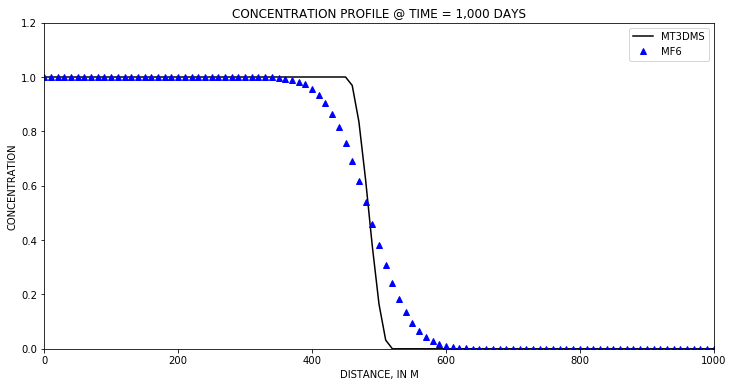

In [5]:
testgroup = 'mt3dms_p01_a'

al = 0.
retardation = 1.
lambda1 = 0.0
mixelm = -1

# Instantiate the model objects
mt3d_ws = os.path.join(testdir, testgroup, 'mt3d')
mf2k5, mt3d, modelname = mt3dms_p01.gen_p01mt3dms(mt3d_ws=mt3d_ws, 
                                                  al=al, 
                                                  retardation=retardation, 
                                                  zero_order_decay=lambda1, 
                                                  mixelm=mixelm, silent=True)

mf6_ws = os.path.join(testdir, testgroup, 'mf6')
xt3d = [False]
mf6, gwtname = mt3dms_p01.gen_p01mf6(mf6_ws, 
                                     al=al, 
                                     retardation=retardation, 
                                     lambda1=lambda1, 
                                     mixelm=mixelm, 
                                     xt3d=xt3d, silent=True)

# Write the models:
# -----------------
mf2k5.write_input()
mt3d.write_input()
mf6.write_simulation()

# Run the models:
# ---------------
# First, scrub the directory of pre-existing output to ensure it doesn't get used accidently if model doesn't complete
mt3dms_p01.clean_model_output(mt3d, mf6, gwtname)

# Regenerate the output
silent = True
mf2k5.run_model(silent=silent)
mt3d.run_model(silent=silent)
success, buff = mf6.run_simulation(silent=silent, report=True)

# Fetch the output and plot:
# --------------------------
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax1 = mt3dms_p01.make_figure(mt3d, mf6, gwtname, ax=ax)

### Plot comparison for problem 1b

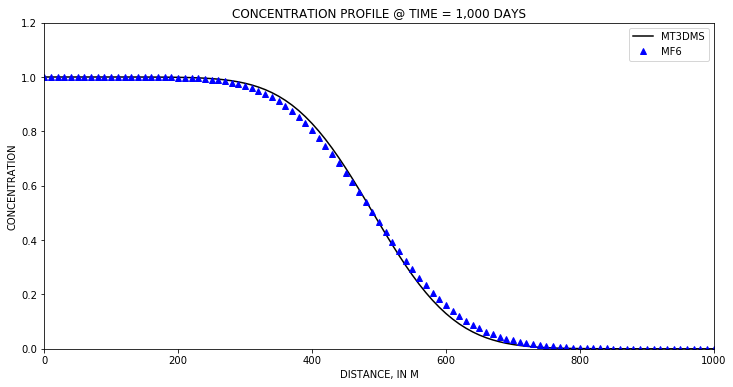

In [6]:
testgroup = 'mt3dms_p01_b'

al = 10.
retardation = 1.
lambda1 = 0.0
mixelm = -1

# Instantiate the model objects
mt3d_ws = os.path.join(testdir, testgroup, 'mt3d')
mf2k5, mt3d, modelname = mt3dms_p01.gen_p01mt3dms(mt3d_ws=mt3d_ws, 
                                                  al=al, 
                                                  retardation=retardation, 
                                                  zero_order_decay=lambda1, 
                                                  mixelm=mixelm, silent=True)

mf6_ws = os.path.join(testdir, testgroup, 'mf6')
xt3d = [True]
mf6, gwtname = mt3dms_p01.gen_p01mf6(mf6_ws, 
                                     al=al, 
                                     retardation=retardation, 
                                     lambda1=lambda1, 
                                     mixelm=mixelm, 
                                     xt3d=xt3d, silent=True)

# Write the models:
# -----------------
mf2k5.write_input()
mt3d.write_input()
mf6.write_simulation()

# Run the models:
# ---------------
# First, scrub the directory of pre-existing output to ensure it doesn't get used accidently if model doesn't complete
mt3dms_p01.clean_model_output(mt3d, mf6, gwtname)

# Regenerate the output
silent = True
mf2k5.run_model(silent=silent)
mt3d.run_model(silent=silent)
success, buff = mf6.run_simulation(silent=silent, report=True)

# Fetch the output and plot:
# --------------------------
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax1 = mt3dms_p01.make_figure(mt3d, mf6, gwtname, ax=ax)

### Plot comparison for problem 1c

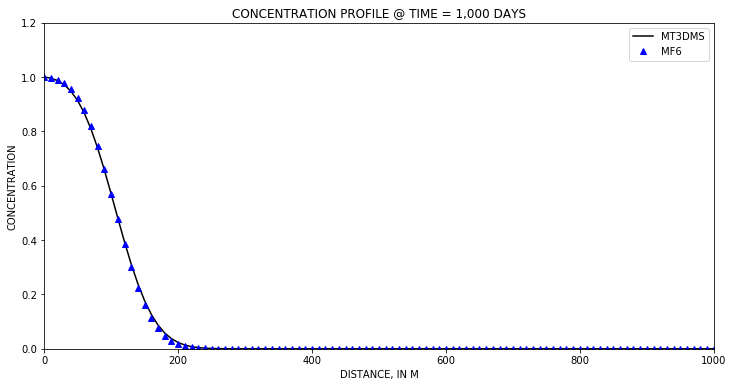

In [7]:
testgroup = 'mt3dms_p01_c'

al = 10.
retardation = 5.
lambda1 = 0.0
mixelm = -1

# Instantiate the model objects
mt3d_ws = os.path.join(testdir, testgroup, 'mt3d')
mf2k5, mt3d, modelname = mt3dms_p01.gen_p01mt3dms(mt3d_ws=mt3d_ws, 
                                                  al=al, 
                                                  retardation=retardation, 
                                                  zero_order_decay=lambda1, 
                                                  mixelm=mixelm, silent=True)

mf6_ws = os.path.join(testdir, testgroup, 'mf6')
xt3d = [False]
mf6, gwtname = mt3dms_p01.gen_p01mf6(mf6_ws, 
                                     al=al, 
                                     retardation=retardation, 
                                     lambda1=lambda1, 
                                     mixelm=mixelm, 
                                     xt3d=xt3d, silent=True)

# Write the models:
# -----------------
mf2k5.write_input()
mt3d.write_input()
mf6.write_simulation()

# Run the models:
# ---------------
# First, scrub the directory of pre-existing output to ensure it doesn't get used accidently if model doesn't complete
mt3dms_p01.clean_model_output(mt3d, mf6, gwtname)

# Regenerate the output
silent = True
mf2k5.run_model(silent=silent)
mt3d.run_model(silent=silent)
success, buff = mf6.run_simulation(silent=silent, report=True)

# Fetch the output and plot:
# --------------------------
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax1 = mt3dms_p01.make_figure(mt3d, mf6, gwtname, ax=ax)

### Plot comparison for problem 1d

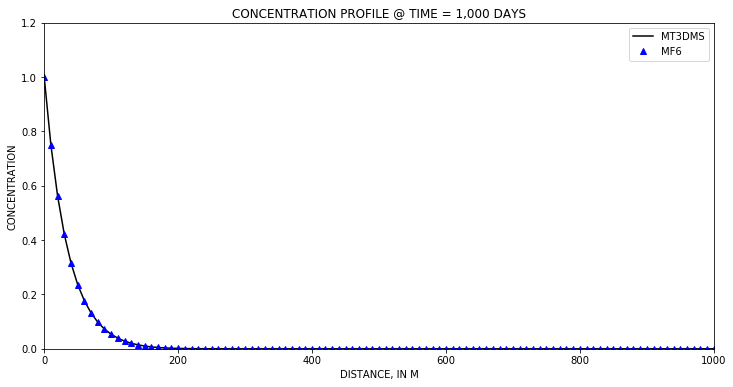

In [8]:
testgroup = 'mt3dms_p01_d'

al = 10.
retardation = 5.
lambda1 = 0.002
mixelm = 0

# Instantiate the model objects
mt3d_ws = os.path.join(testdir, testgroup, 'mt3d')
mf2k5, mt3d, modelname = mt3dms_p01.gen_p01mt3dms(mt3d_ws=mt3d_ws, 
                                                  al=al, 
                                                  retardation=retardation, 
                                                  zero_order_decay=lambda1, 
                                                  mixelm=mixelm, silent=True)

mf6_ws = os.path.join(testdir, testgroup, 'mf6')
xt3d = [False]
mf6, gwtname = mt3dms_p01.gen_p01mf6(mf6_ws, 
                                     al=al, 
                                     retardation=retardation, 
                                     lambda1=lambda1, 
                                     mixelm=mixelm, 
                                     xt3d=xt3d, silent=True)

# Write the models:
# -----------------
mf2k5.write_input()
mt3d.write_input()
mf6.write_simulation()

# Run the models:
# ---------------
# First, scrub the directory of pre-existing output to ensure it doesn't get used accidently if model doesn't complete
mt3dms_p01.clean_model_output(mt3d, mf6, gwtname)

# Regenerate the output
silent = True
mf2k5.run_model(silent=silent)
mt3d.run_model(silent=silent)
success, buff = mf6.run_simulation(silent=silent, report=True)

# Fetch the output and plot:
# --------------------------
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax1 = mt3dms_p01.make_figure(mt3d, mf6, gwtname, ax=ax)